2025-03-28 11:51:03.501 | INFO     | tf_chpvk_pv.config:<module>:11 - PROJ_ROOT path is: /home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV


2025-03-28 11:51:04.544 | INFO     | tf_chpvk_pv.dataset:create_dataset:39 - Processing dataset...
2025-03-28 11:51:05.756 | SUCCESS  | tf_chpvk_pv.dataset:create_dataset:164 - Processing dataset complete.
2025-03-28 11:51:06.012 | INFO     | tf_chpvk_pv.dataset:train_test_split_:178 - Creating train and test dataset...
2025-03-28 11:51:06.026 | SUCCESS  | tf_chpvk_pv.dataset:train_test_split_:212 - Creating train and test dataset complete.


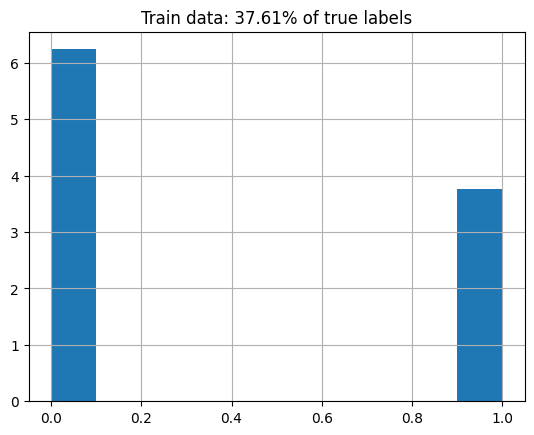

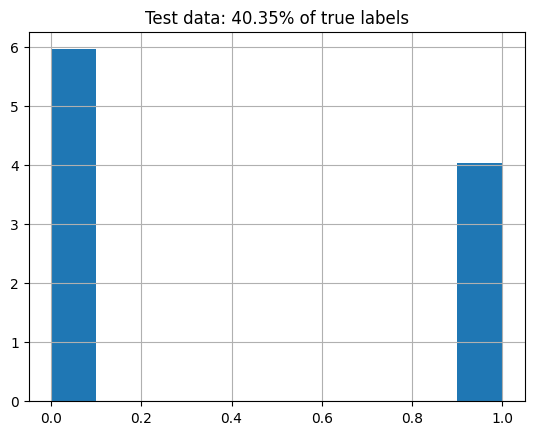

In [1]:
from tf_chpvk_pv.dataset import *
import matplotlib.pyplot as plt
import pandas as pd

df = create_dataset()

train_df, test_df = train_test_split_()

train_df.exp_label.hist(density=True)
amount_of_true = train_df[train_df.exp_label == 1].shape[0]/train_df.shape[0]
plt.title('Train data: {:.2f}% of true labels'.format(amount_of_true*100))
plt.show()
test_df.exp_label.hist(density=True)
amount_of_true = test_df[test_df.exp_label == 1].shape[0]/test_df.shape[0]
plt.title('Test data: {:.2f}% of true labels'.format(amount_of_true*100))
plt.show()

In [4]:
from tf_chpvk_pv.modeling.train import *

train_df, test_df, tolerance_factor_dict = evaluate_t_sisso('')

In [110]:
df = pd.concat([train_df, test_df])
df['type'] = 'Halogen'
df.loc[df.rX == 184.4, 'type'] = 'Chalcogen'
df.loc[df.rX == 198.14, 'type'] = 'Chalcogen'
df.loc[df['exp_label'] == 1, 'stab'] = 'Stable PVK'
df.loc[df['exp_label'] == 0, 'stab'] = 'Unstable PVK'

AttributeError: Rectangle.set() got an unexpected keyword argument 'margin_title'

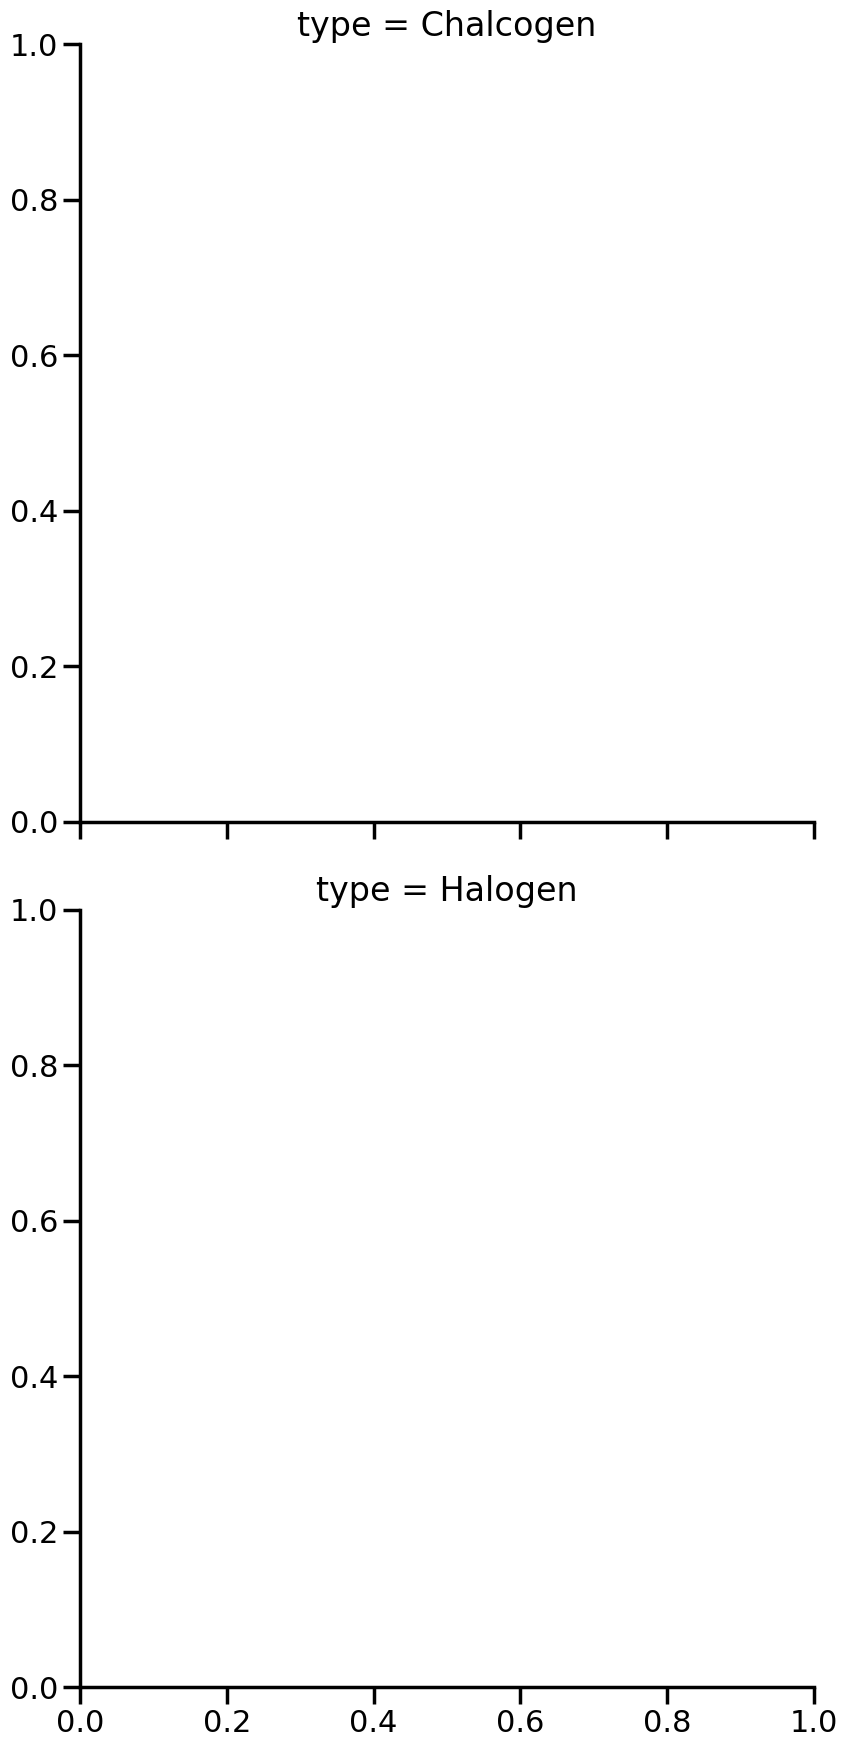

In [144]:
import seaborn as sns
from tf_chpvk_pv.config import FIGURES_DIR

sns.set_context("poster")
fg = sns.displot(data=df, x='t_jess', hue='stab',
                row='type', bins=50, 
                stat='count', height=9,
                multiple='dodge', margin_title=True)



#sns.histplot(data=df, x='t_jess', hue=['exp_label', 'type'], bins=50, stat='percent', common_norm=False, multiple='dodge')
#sns.histplot(data=df[df['exp_label'] == 0], x='t_jess', hue='type', bins=50, stat='percent', common_norm=False, multiple='dodge')

xlims = [0.5, 1.3]
ylims = [0, 16]
th = [0.9, 1.12]

fg.refline(x=th[0], color='k', linestyle='--')
fg.refline(x=th[1], color='k', linestyle='--')

for ax in fg.axes:
    ax[0].fill_between([xlims[0],th[0]], ylims[0], ylims[1], color='red', alpha=0.1)
    ax[0].fill_between([th[0], th[1]], ylims[0], ylims[1], color='blue', alpha=0.1)
    ax[0].fill_between([th[1], xlims[1]], ylims[0], ylims[1], color='red', alpha=0.1)

plt.xlim(xlims)
plt.ylim(ylims)
sns.move_legend(fg, "upper left", title=None, frameon=False,
                bbox_to_anchor=(0.1, 0.97))

fg.set_axis_labels(x_var='Modified tolerance factor t* (Jess et. al.)', y_var='Counts')
fg.savefig(FIGURES_DIR / 'hist_dataset.png')

In [67]:
fg.axes[0][0]

<Axes: title={'center': 'type = Chalcogen'}, ylabel='Count'>

In [34]:
df.columns

Index(['exp_label', 'rA', 'rB', 'rX', 'nA', 'nB', 'nX', 'chiA', 'chiB', 'chiX',
       'rB_rX_ratio', 'rA_rX_ratio', 'delta_chi_AX', 'delta_chi_BX',
       'delta_chi_AO', 'delta_chi_BO', 'chi_AX_ratio', 'chi_BX_ratio',
       'log_rA_rB_ratio', 'HOMO_A', 'HOMO_B', 'HOMO_X', 'LUMO_A', 'LUMO_B',
       'LUMO_X', 'EA_A', 'EA_B', 'EA_X', 'IP_A', 'IP_B', 'IP_X', 'rS_A',
       'rS_B', 'rS_X', 'rP_A', 'rP_B', 'rP_X', 'rD_A', 'rD_B', 'rD_X',
       'rA_rB_ratio', 't', 'tau', 't_jess'],
      dtype='object')